In [4]:
import pandas as pd

dt = pd.read_csv('hashtag_donaldtrump.csv', lineterminator='\n')
db = pd.read_csv('hashtag_joebiden.csv', lineterminator='\n')
dt.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121


In [74]:
a = dt.loc[(dt.country=='United States of America') | (dt.country=='United States') ].groupby('state').size().to_frame('size').reset_index()
b = db.loc[(db.country=='United States of America') | (db.country=='United States')].groupby('state').size().to_frame('size').reset_index()
a.head()

,state,size
0,Alabama,770
1,Alaska,300
2,Arizona,2745
3,Arkansas,600
4,California,29966


In [75]:
c = a.merge(b, left_on='state',right_on='state',how='outer').rename(columns={"size_x": "Trump", "size_y": "Biden"})
c.head()

,state,Trump,Biden
0,Alabama,770.0,810
1,Alaska,300.0,411
2,Arizona,2745.0,3096
3,Arkansas,600.0,440
4,California,29966.0,24230


In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
tidy = c.melt(id_vars='state').rename(columns={'state':'State','variable':'Candidate','value':'Count'}).sort_values('Count', ascending=False)
tidy

,State,Candidate,Count
4,California,Trump,29966.0
58,California,Biden,24230.0
33,New York,Trump,21931.0
87,New York,Biden,19361.0
9,Florida,Trump,15843.0
...,...,...,...
43,South Dakota,Trump,73.0
65,Guam,Biden,5.0
11,Guam,Trump,4.0
107,Northern Mariana Islands,Biden,1.0


In [77]:
swing=['Ohio','Texas','Iowa','Georgia','Florida','North Carolina','Nevada','Arizona','Pennsylvania','Michigan','Wisconsin','Minnesota','New Hampshire']


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

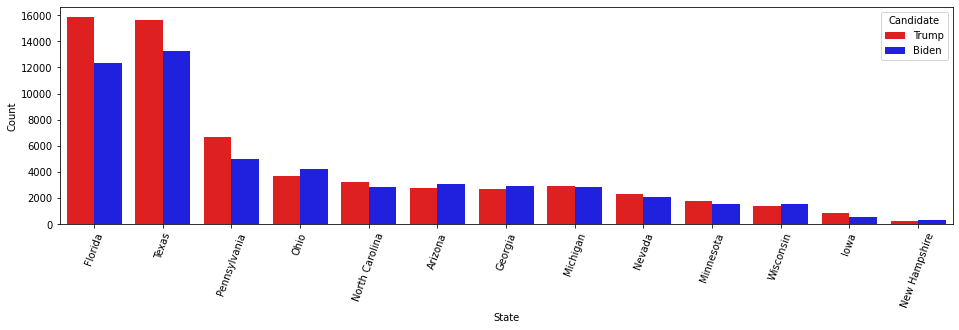

In [78]:
f = plt.figure(figsize=(16,4))
ax = sns.barplot(x='State', y='Count', hue='Candidate', data=tidy.loc[tidy.State.isin(swing)], palette=['r','b'])
plt.xticks(rotation=70)

The above figure shows the number of tweets for Trump and Biden respectively in each swing state in the US. We can see that in general there are more tweets about Trump than Biden. If we want to get a clue of which color a state turns out based on the number of tweets for both candidates, we need to be careful because from the posterior results only in Florida and Texas where the difference in number is large does the number of tweets aligns with the outcome.

Text(0, 0.5, 'Retweet Count')

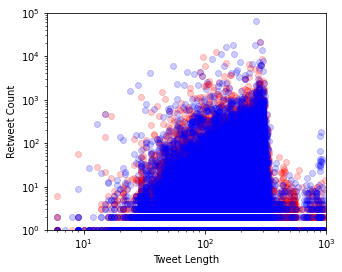

In [84]:
f = plt.figure(figsize=(5,4))
import numpy as np
length_checker = np.vectorize(len)
plt.scatter(length_checker(dt.tweet), dt.retweet_count,color='r',alpha=0.2,figure=f)
plt.scatter(length_checker(db.tweet), db.retweet_count,color='b',alpha=0.2,figure=f)
plt.xscale('log')
plt.yscale('log')
plt.xlim(5,1e3)
plt.ylim(1,1e5)
plt.yscale('log')
plt.xlabel('Tweet Length')
plt.ylabel('Retweet Count')

The above figure shows retweet count vs. tweet length. Retweet count generally grows with tweet length before a tweet is too long.